In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
%matplotlib inline

**Perform hierarchical clustering on the Play data and and the data generated with the help of two equations of concentric circles, adding some random noise. Apply various distance measures, including single, multiple, and average linkages, and ward.**

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
play_df = pd.read_excel('play.xlsx')-------------------------

In [4]:
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder = OrdinalEncoder()

play_df_encoded = ordinalEncoder.fit_transform(play_df)

The AgglomerativeClustering class performs hierarchical agglomerative clustering on a set of data points. The two arguments passed to the class when creating an instance of it, affinity and linkage, specify how the distances between the clusters will be calculated and how the clusters will be merged.

affinity specifies the metric to be used to compute the distance between the data points. In this case, 'euclidean' means that the Euclidean distance will be used.
linkage specifies the strategy to be used for merging the clusters. 'single' means that the "single linkage" strategy will be used, which considers the minimum pairwise distance between the points in the two clusters when merging.

In [5]:
hc_play = AgglomerativeClustering(affinity='euclidean', linkage='single')

In [6]:
hc_play.fit(play_df_encoded)

AgglomerativeClustering(linkage='single')

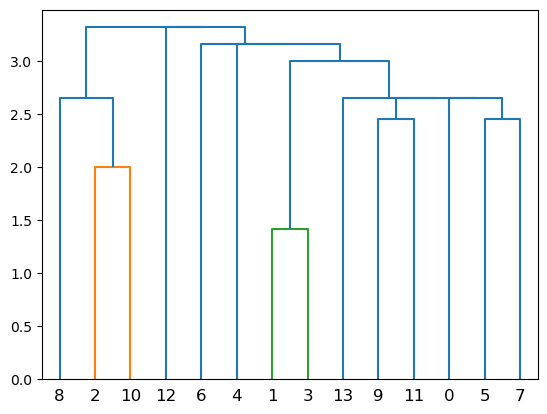

In [7]:
dendogram = sch.dendrogram(sch.linkage(play_df_encoded, method='single'))

In [8]:
hc_play = AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [9]:
hc_play.fit(play_df_encoded)

AgglomerativeClustering(linkage='complete')

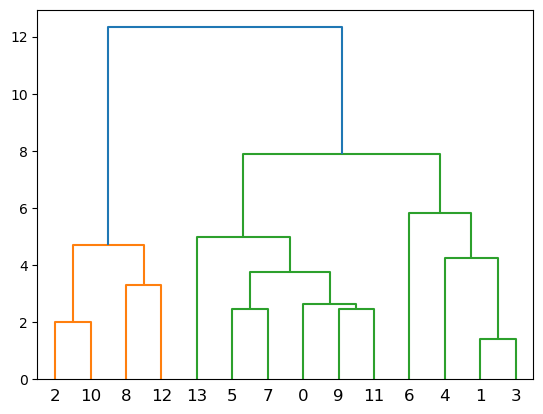

In [10]:
dendogram = sch.dendrogram(sch.linkage(play_df_encoded, method='complete'))

In [11]:
hc_play = AgglomerativeClustering(affinity='euclidean', linkage='average')

In [12]:
hc_play.fit(play_df_encoded)

AgglomerativeClustering(linkage='average')

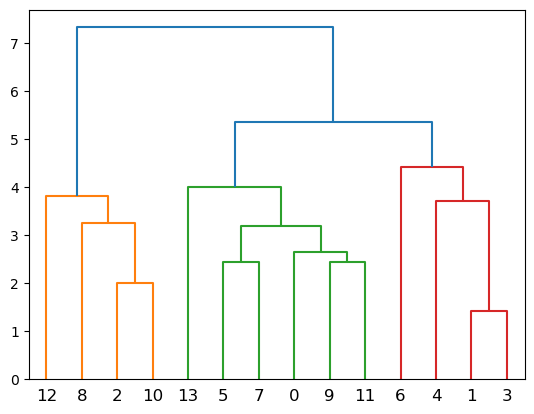

In [13]:
dendogram = sch.dendrogram(sch.linkage(play_df_encoded, method='average'))

In [14]:
hc_play = AgglomerativeClustering(affinity='euclidean', linkage='ward')

In [15]:
hc_play.fit(play_df_encoded)

AgglomerativeClustering()

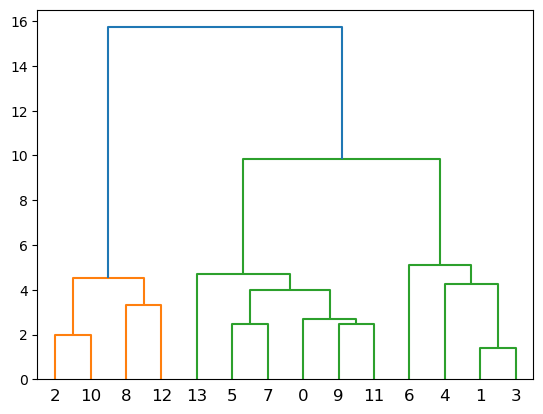

In [16]:
dendogram = sch.dendrogram(sch.linkage(play_df_encoded, method='ward'))

In [17]:
i = np.arange(0,360,5)
i

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355])

In [18]:
import math
import random
theta = []
for deg in i:
    theta.append((deg * math.pi) / 180)

In [19]:
r1 = 5
r2 = 10

In [20]:
x1 = []
for radian in theta:
    x1.append(r1 * math.cos(radian))
y1 = [] 
noise_arr = np.random.normal(0,0.2,len(x1))
itr = 0
for radian in theta:
    y1.append(r1 * math.sin(radian) + noise_arr[itr])
    itr+=1

In [21]:
x2 = []
for radian in theta:
    x1.append(r2 * math.cos(radian))
y2 = [] 
for radian in theta:
    y1.append(r2 * math.sin(radian) + random.random())

In [22]:
firstDf = pd.DataFrame({
    "xv": x1,
    "yv": y1,
})

In [23]:
firstDf

,xv,yv
0,5.000000,-0.053458
1,4.980973,0.269783
2,4.924039,1.014517
3,4.829629,1.330404
4,4.698463,1.644522
...,...,...
139,9.063078,-3.627441
140,9.396926,-3.401163
141,9.659258,-1.965952
142,9.848078,-1.660088


In [24]:
secondDf = pd.DataFrame({
    "xv": x1,
    "yv": y1,
})

In [25]:
secondDf

,xv,yv
0,5.000000,-0.053458
1,4.980973,0.269783
2,4.924039,1.014517
3,4.829629,1.330404
4,4.698463,1.644522
...,...,...
139,9.063078,-3.627441
140,9.396926,-3.401163
141,9.659258,-1.965952
142,9.848078,-1.660088


<AxesSubplot:xlabel='xv'>

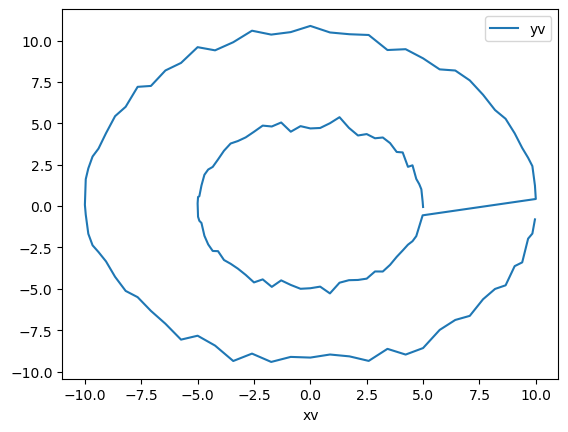

In [26]:
firstDf.plot(x="xv", y="yv")

<AxesSubplot:xlabel='xv'>

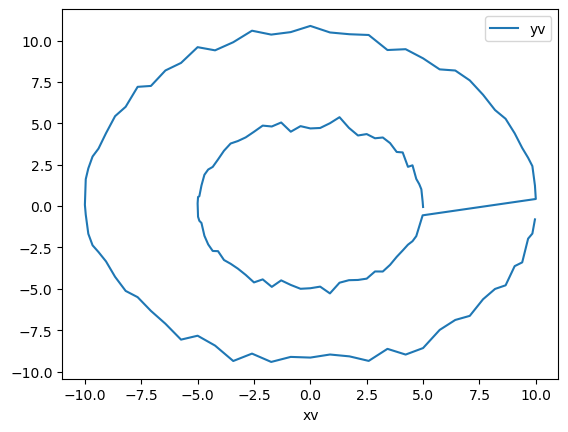

In [27]:
secondDf.plot(x="xv", y="yv")

In [28]:
data = [firstDf, secondDf]

circle_data = pd.concat(data)

circle_data.head()

,xv,yv
0,5.000000,-0.053458
1,4.980973,0.269783
2,4.924039,1.014517
3,4.829629,1.330404
4,4.698463,1.644522


<AxesSubplot:xlabel='xv'>

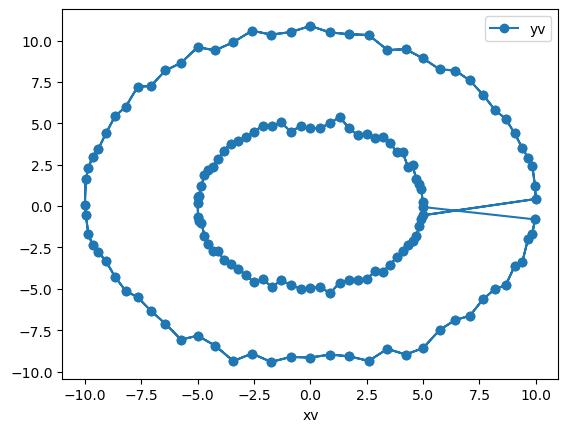

In [29]:
circle_data.plot(x='xv', y='yv', marker="o")

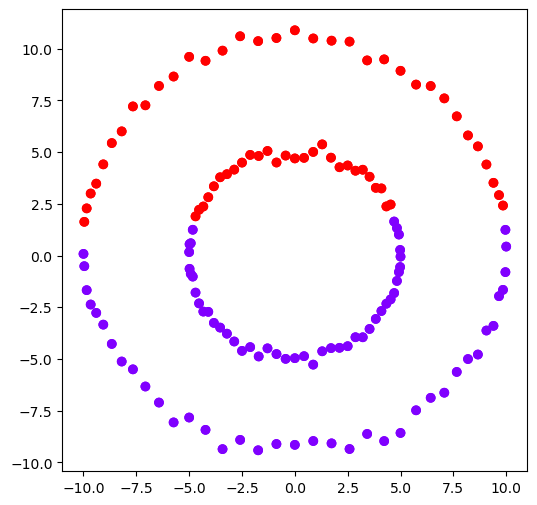

In [30]:
circle_hc = AgglomerativeClustering(n_clusters = 2)

plt.figure(figsize =(6, 6))
plt.scatter(circle_data['xv'], circle_data['yv'],
           c = circle_hc.fit_predict(circle_data), cmap ='rainbow')
plt.show()

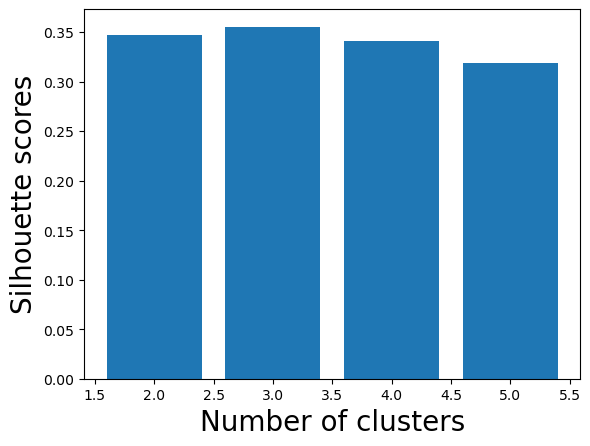

In [31]:
from sklearn.metrics import silhouette_score
# Appending the silhouette scores of the different models to the list
circle_k_values = []
circle_silhouette_scores = []
for k_values in range(2, 6):
    circle_k_values.append(k_values)
    circle_hc = AgglomerativeClustering(n_clusters=k_values)
    circle_silhouette_scores.append(
        silhouette_score(circle_data, circle_hc.fit_predict(circle_data)))
 
# Plotting a bar graph to compare the results
plt.bar(circle_k_values, circle_silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Silhouette scores', fontsize = 20)
plt.show()

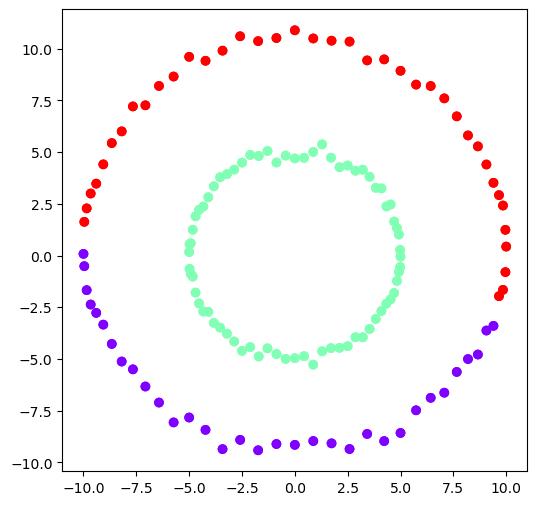

In [32]:
circle_hc = AgglomerativeClustering(n_clusters = 3, linkage='single')

plt.figure(figsize =(6, 6))
plt.scatter(circle_data['xv'], circle_data['yv'],
           c = circle_hc.fit_predict(circle_data), cmap ='rainbow')
plt.show()

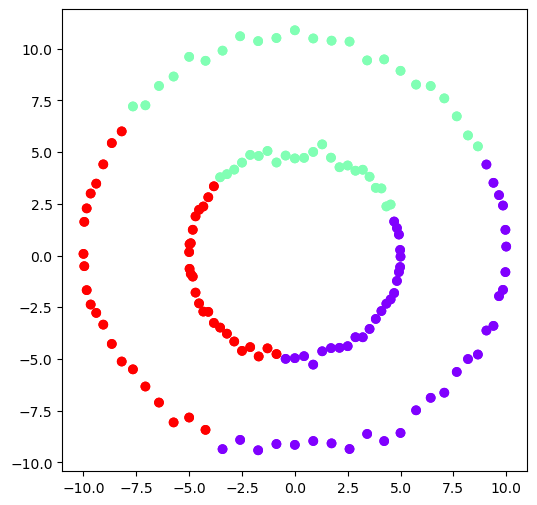

In [33]:
circle_hc = AgglomerativeClustering(n_clusters = 3, linkage='complete')

plt.figure(figsize =(6, 6))
plt.scatter(circle_data['xv'], circle_data['yv'],
           c = circle_hc.fit_predict(circle_data), cmap ='rainbow')
plt.show()

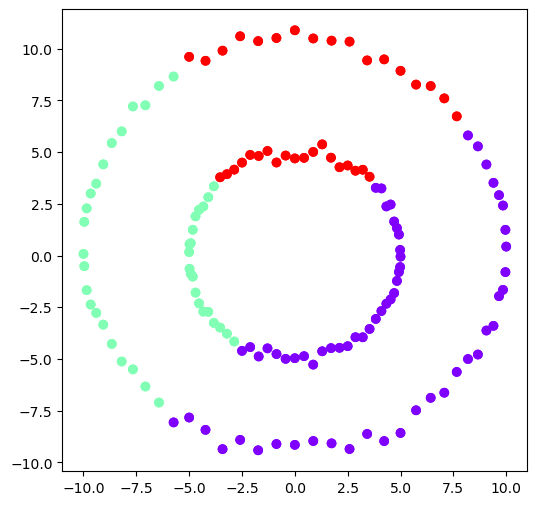

In [34]:
circle_hc = AgglomerativeClustering(n_clusters = 3, linkage='average')

plt.figure(figsize =(6, 6))
plt.scatter(circle_data['xv'], circle_data['yv'],
           c = circle_hc.fit_predict(circle_data), cmap ='rainbow')
plt.show()

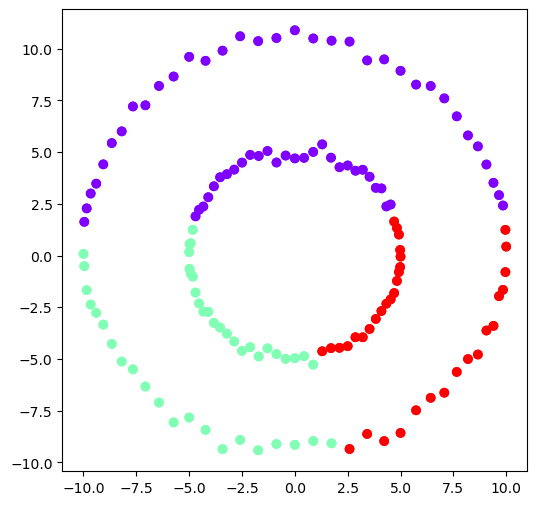

In [35]:
circle_hc = AgglomerativeClustering(n_clusters = 3, linkage='ward')

plt.figure(figsize =(6, 6))
plt.scatter(circle_data['xv'], circle_data['yv'],
           c = circle_hc.fit_predict(circle_data), cmap ='rainbow')
plt.show()

**Perform k-Means clustering on the Play data and also Boston housing data and arrive at an optimal number of clusters via the elbow method.**

In [36]:
play_df = pd.read_excel('play.xlsx')

In [37]:
play_df.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


Exploratory data analysis

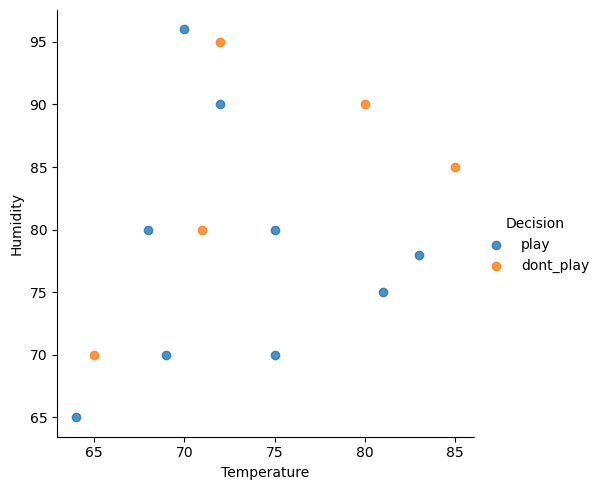

In [39]:
sns.lmplot(data=play_df, x='Temperature', y='Humidity', hue='Decision', fit_reg=False)

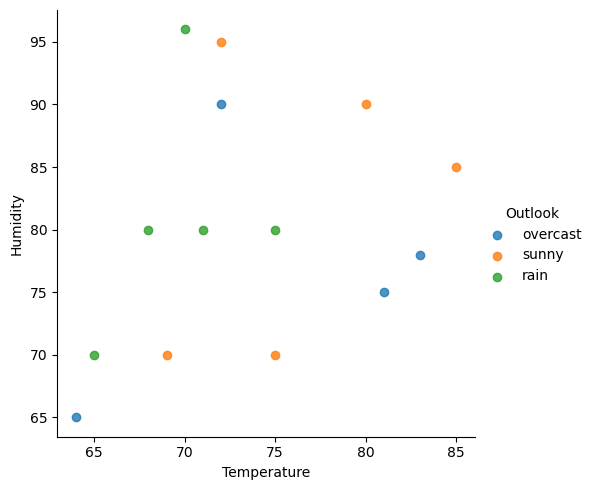

In [40]:
sns.lmplot(data=play_df, x='Temperature', y='Humidity', hue='Outlook', fit_reg=False)

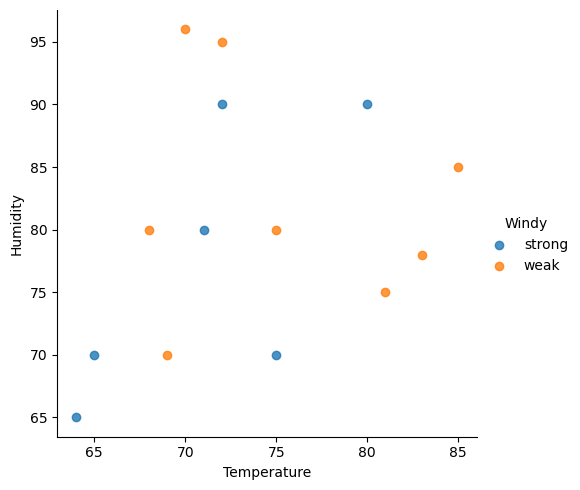

In [42]:
sns.lmplot(data=play_df, x='Temperature', y='Humidity', hue='Windy', fit_reg=False)

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
ordinalEncoder = OrdinalEncoder()

In [45]:
play_encoded_df = ordinalEncoder.fit_transform(play_df)

In [46]:
play_encoded_df

array([[ 0.,  6.,  6.,  0.,  1.],
       [ 0., 10.,  3.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  9.,  2.,  1.,  1.],
       [ 2.,  7.,  1.,  0.,  1.],
       [ 2.,  8.,  6.,  0.,  0.],
       [ 2., 11.,  5.,  1.,  0.],
       [ 2.,  6.,  7.,  1.,  0.],
       [ 2.,  3.,  1.,  1.,  1.],
       [ 1.,  5.,  4.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.],
       [ 1.,  7.,  4.,  1.,  1.],
       [ 1.,  2.,  4.,  1.,  1.],
       [ 1.,  4.,  8.,  1.,  1.]])

In [47]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters = 2)

In [49]:
kmeans.fit(play_encoded_df)

KMeans(n_clusters=2)

In [50]:
kmeans.cluster_centers_

array([[1.  , 1.5 , 1.5 , 0.5 , 0.75],
       [1.1 , 7.3 , 4.6 , 0.6 , 0.6 ]])

In [51]:
n_clusters = []
cluster_cost = []

for cluster in range(1,10):
    try:
        kmeans = KMeans(n_clusters=cluster)
        kmeans.fit(play_encoded_df)
        n_clusters.append(cluster)
        cluster_cost.append(kmeans.inertia_)
    except:
        break

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

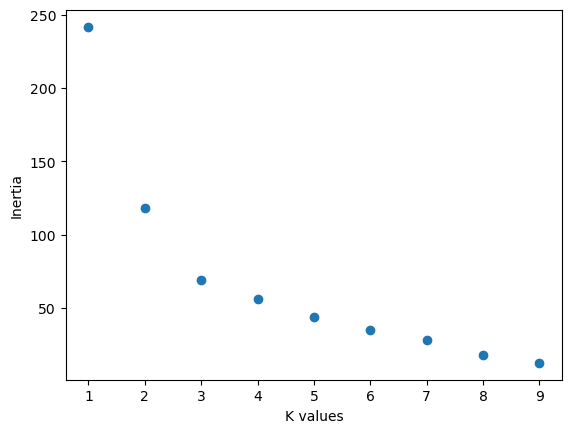

In [52]:
fig, ax = plt.subplots()
plt.scatter(n_clusters, cluster_cost)
ax.set_xlabel("K values")
ax.set_ylabel("Inertia")

From the elbow graph we find that the k value 4 is the suitable cluster value

In [53]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(play_encoded_df)
print(kmeans.inertia_)

55.64999999999999


**Tried the k-prototype clustering for data having both categorical and numerical values**

In [54]:
play_df = pd.read_excel('play.xlsx')

In [55]:
play_df.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


Checking for null values in the dataframe

In [56]:
play_df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Windy          0
Decision       0
dtype: int64

In [57]:
feature_array = play_df.values

In [58]:
# feature_array[:, 1] = continuous_feature_array[:, 1].astype(int)
# feature_array[:, 2] = continuous_feature_array[:, 2].astype(int)

In [61]:
feature_array

array([['overcast', 72, 90, 'strong', 'play'],
       ['overcast', 83, 78, 'weak', 'play'],
       ['overcast', 64, 65, 'strong', 'play'],
       ['overcast', 81, 75, 'weak', 'play'],
       ['sunny', 75, 70, 'strong', 'play'],
       ['sunny', 80, 90, 'strong', 'dont_play'],
       ['sunny', 85, 85, 'weak', 'dont_play'],
       ['sunny', 72, 95, 'weak', 'dont_play'],
       ['sunny', 69, 70, 'weak', 'play'],
       ['rain', 71, 80, 'strong', 'dont_play'],
       ['rain', 65, 70, 'strong', 'dont_play'],
       ['rain', 75, 80, 'weak', 'play'],
       ['rain', 68, 80, 'weak', 'play'],
       ['rain', 70, 96, 'weak', 'play']], dtype=object)

In [62]:
kproto = KPrototypes(n_clusters=3)
clusters = kproto.fit_predict(feature_array, categorical=[0, 3, 4])

In [63]:
print(kproto.cluster_centroids_)

[['81.0' '79.5' 'overcast' 'weak' 'play']
 ['68.66666666666667' '72.5' 'rain' 'strong' 'play']
 ['73.5' '92.75' 'sunny' 'weak' 'play']]


In [64]:
clusters_count = []
for cluster in clusters:
    clusters_count.append(cluster);

In [65]:
play_df['Clusters'] = clusters_count

In [66]:
play_df[play_df['Clusters'] == 0]

,Outlook,Temperature,Humidity,Windy,Decision,Clusters
1,overcast,83,78,weak,play,0
3,overcast,81,75,weak,play,0
6,sunny,85,85,weak,dont_play,0
11,rain,75,80,weak,play,0


In [67]:
play_df[play_df['Clusters'] == 1]

,Outlook,Temperature,Humidity,Windy,Decision,Clusters
2,overcast,64,65,strong,play,1
4,sunny,75,70,strong,play,1
8,sunny,69,70,weak,play,1
9,rain,71,80,strong,dont_play,1
10,rain,65,70,strong,dont_play,1
12,rain,68,80,weak,play,1


In [68]:
play_df[play_df['Clusters'] == 2]

,Outlook,Temperature,Humidity,Windy,Decision,Clusters
0,overcast,72,90,strong,play,2
5,sunny,80,90,strong,dont_play,2
7,sunny,72,95,weak,dont_play,2
13,rain,70,96,weak,play,2


In [69]:
cluster_cost = []
cluster_list = []
for cluster in range(1, 10):
    try:
        kproto = KPrototypes(n_clusters=cluster, random_state=0)
        kproto.fit_predict(feature_array, categorical=[0, 3, 4])
        cluster_cost.append(kproto.cost_)
        cluster_list.append(cluster)
    except:
        break

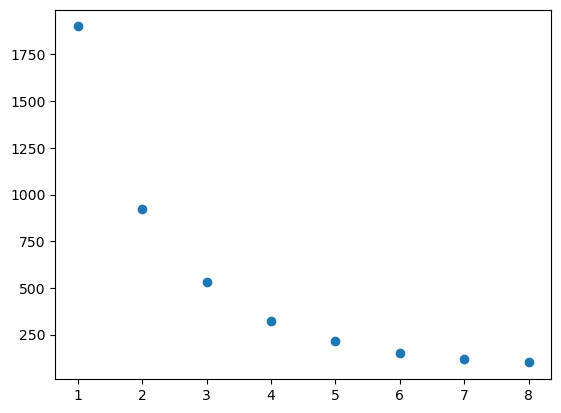

In [70]:
plt.scatter(x=cluster_list, y=cluster_cost)

# cluster_data_df = pd.DataFrame({
#     "Cluster": cluster_list,
#     "Cluster_Cost": cluster_cost
# })

# sns.lmplot(data=cluster_data_df ,x="Cluster", y="Cluster_Cost")

From the elbow plot we can infer that 4 number of clusters is our best bet.

In [71]:
kproto = KPrototypes(n_clusters=4)
clusters = kproto.fit_predict(feature_array, categorical=[0, 3, 4])

In [72]:
print(kproto.cluster_centroids_)

[['71.33333333333333' '80.0' 'rain' 'weak' 'play']
 ['83.0' '79.33333333333333' 'overcast' 'weak' 'play']
 ['73.5' '92.75' 'sunny' 'strong' 'dont_play']
 ['68.25' '68.75' 'sunny' 'strong' 'play']]


The above 2D array gives us the centroid of all 4 clusters

In [73]:
# from sklearn.preprocessing import StandardScaler

In [74]:
# scaler = StandardScaler()
# play_num_cols = ['Temperature', 'Humidity']

# play_df_scale = play_df.copy()

# for col in play_num_cols:
#     play_df_scale[col] = scaler.fit_transform(play_df[[col]])

In [75]:
# play_df_scale.head()

**K-means on Boston housing dataset**

In [78]:
boston_data = pd.read_excel('boston housing.xls')

In [79]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


**Exploratory data analysis on Boston housing data set**

<Figure size 1200x1200 with 0 Axes>

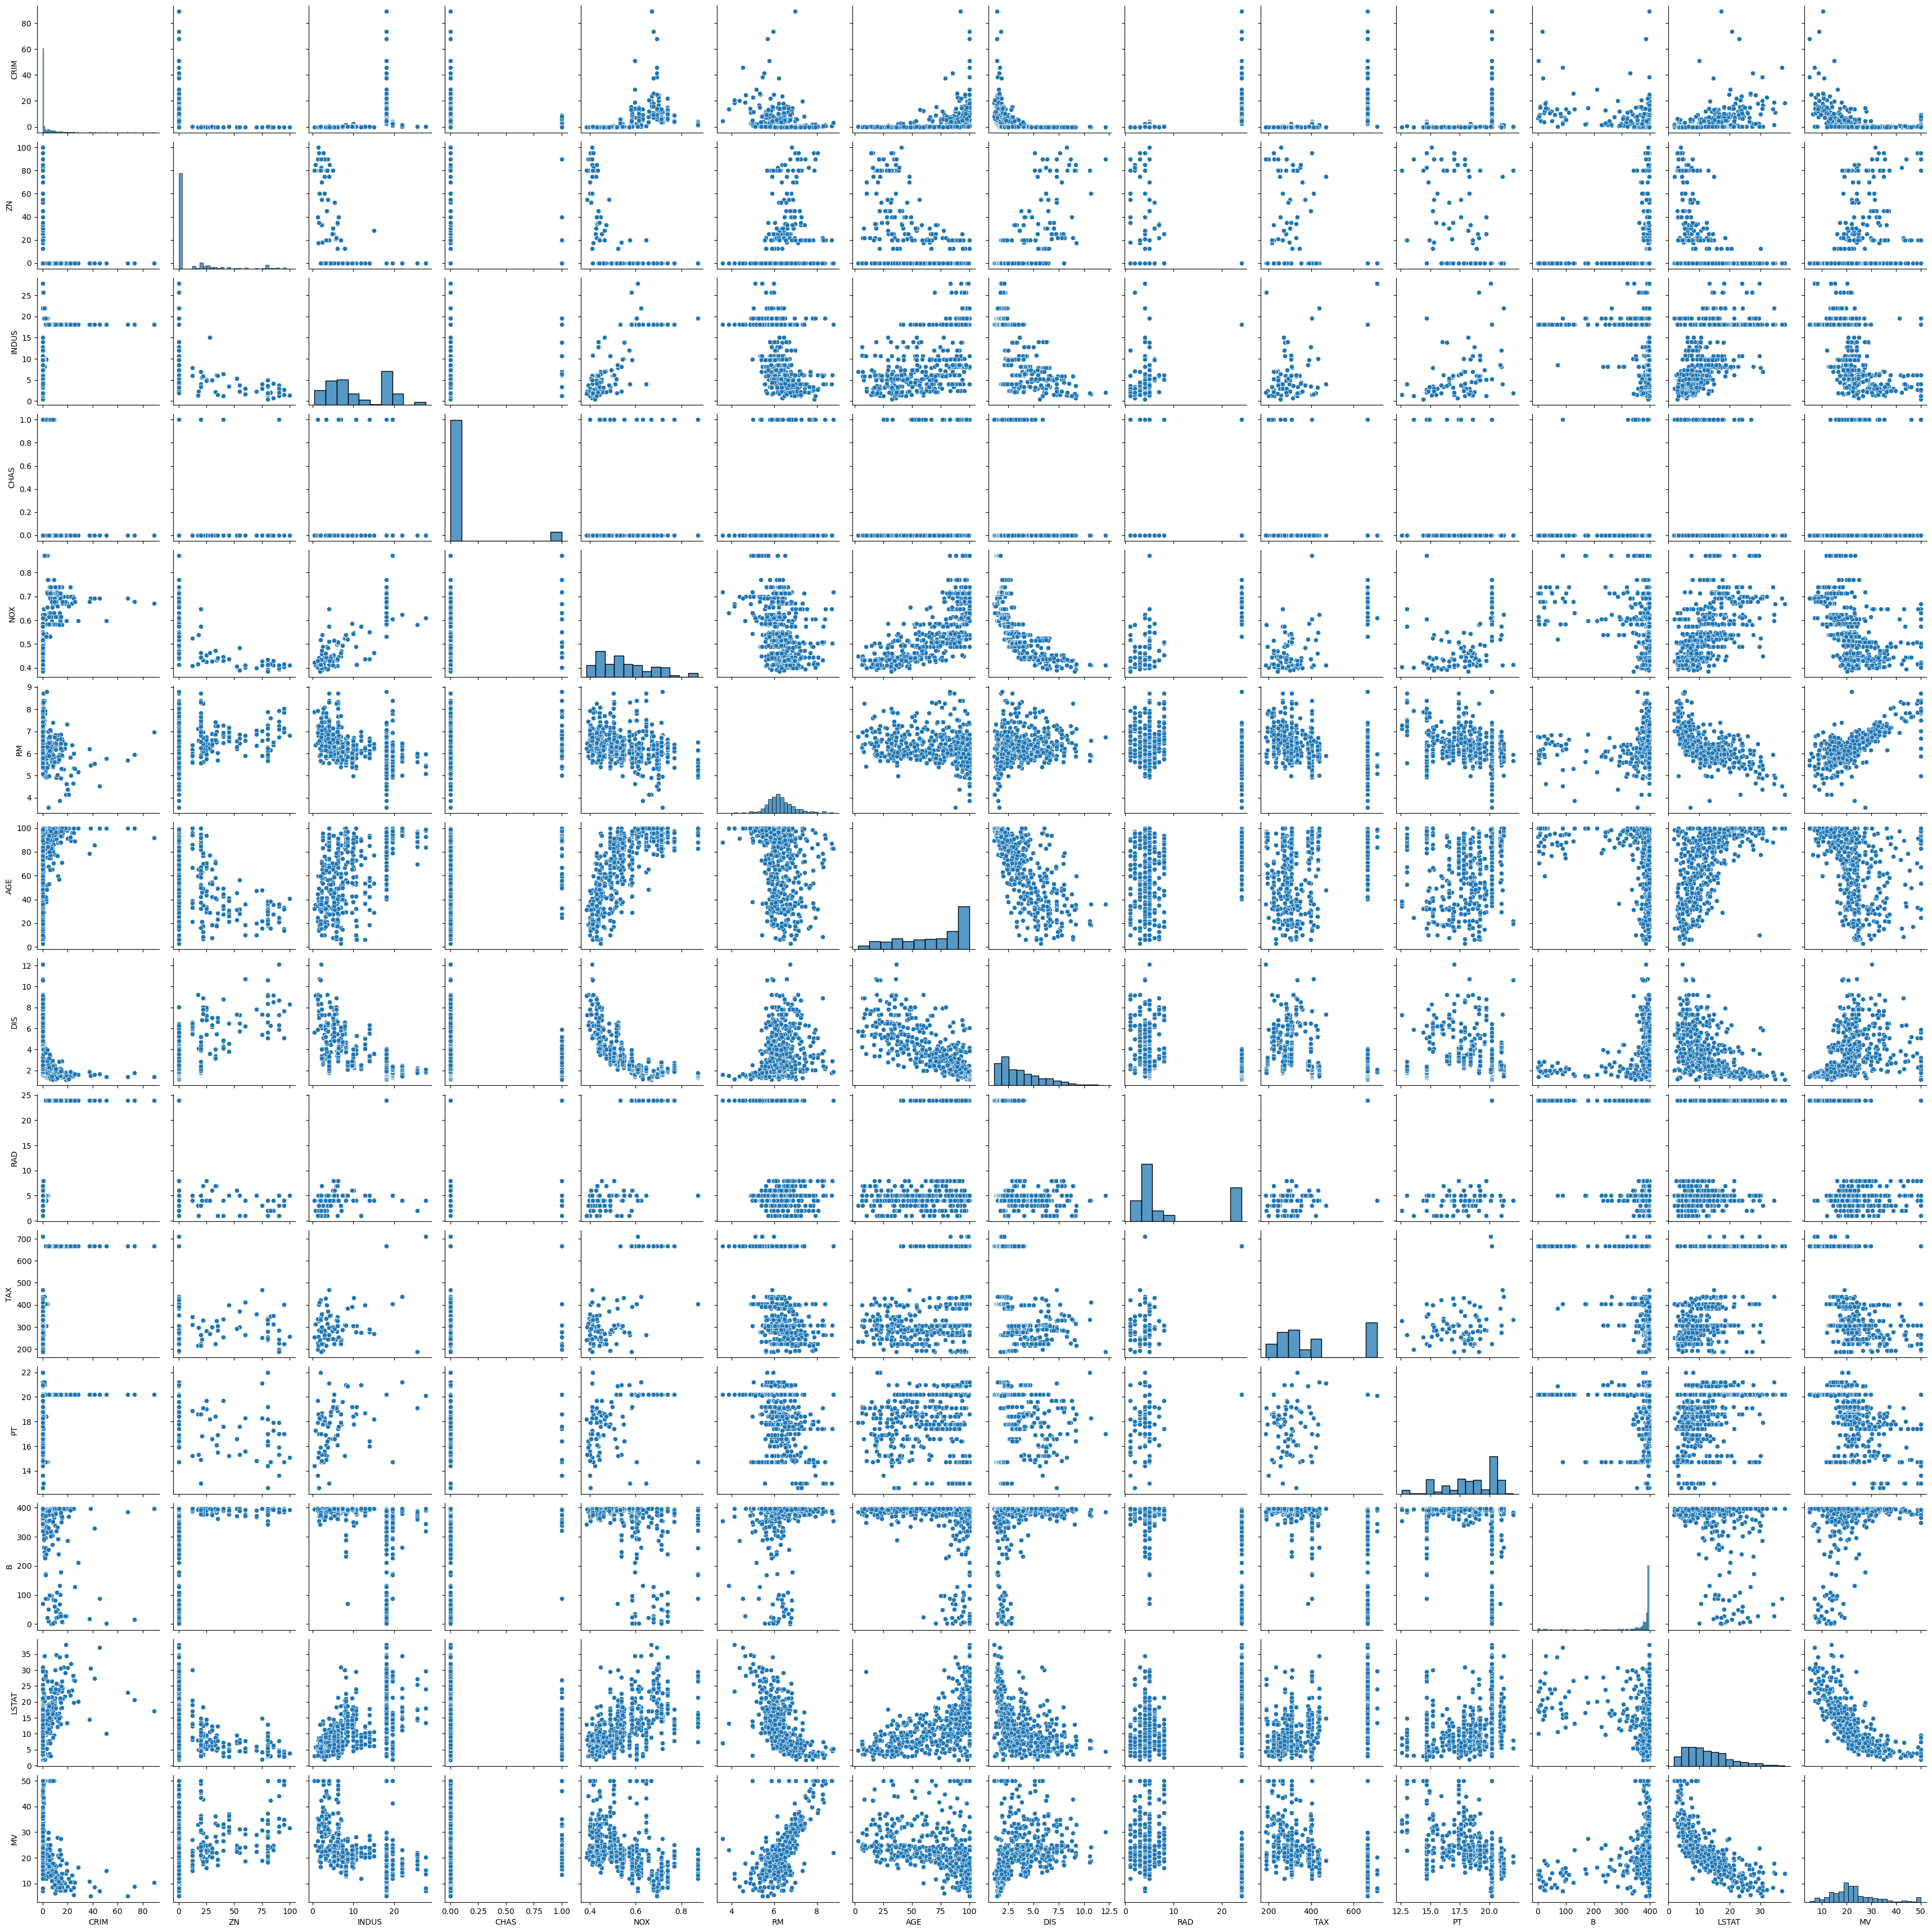

<Figure size 1200x1200 with 0 Axes>

In [80]:
sns.pairplot(boston_data)
plt.figure(figsize=(12, 12))

Checking the correlation between the columns

In [81]:
boston_data_corr = boston_data.corr()

<AxesSubplot:>

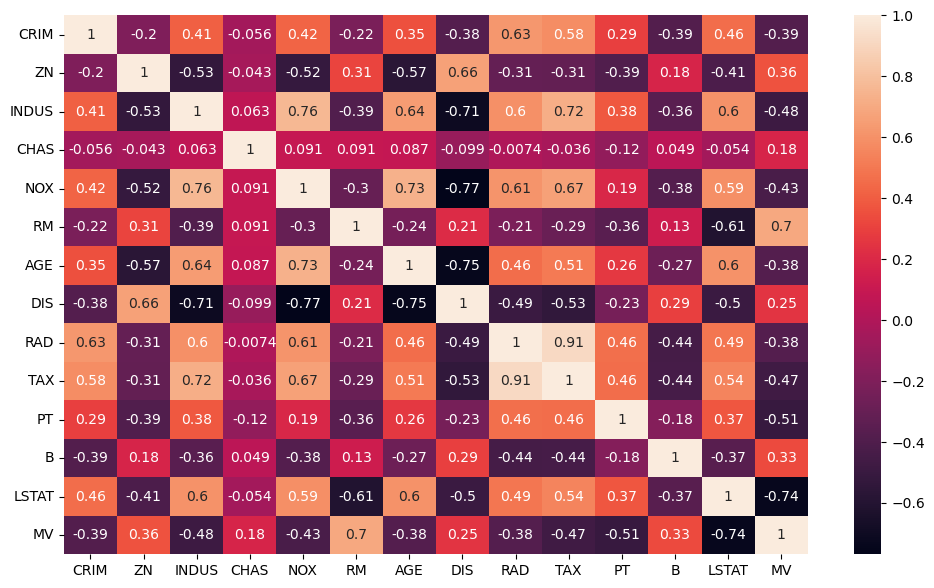

In [82]:
plt.figure(figsize=(12,7))
sns.heatmap(boston_data_corr, annot=True)


Text(0.5, 0, 'RM')

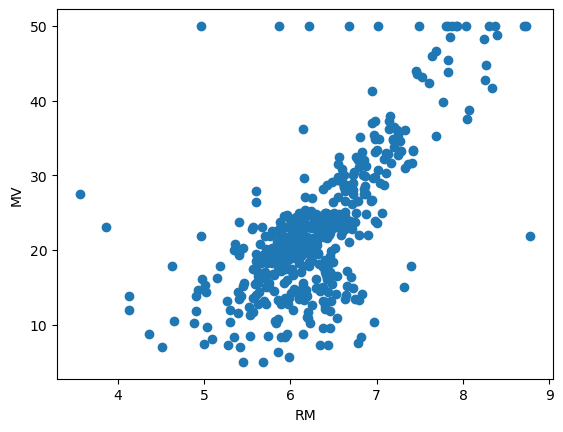

In [83]:
#Plotted a graph scatter plot between as MV and RM are highly correlated

fig, ax = plt.subplots()
plt.scatter(boston_data['RM'], boston_data['MV'])
ax.set_ylabel('MV')
ax.set_xlabel('RM')

In [84]:
boston_clusters = []
boston_cluster_inertia = []
for cluster in range(1, 10):
    try:
        kmeans_boston = KMeans(n_clusters=cluster)
        kmeans_boston.fit(boston_data)
        boston_clusters.append(cluster)
        boston_cluster_inertia.append(kmeans_boston.inertia_)
    except:
        break

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

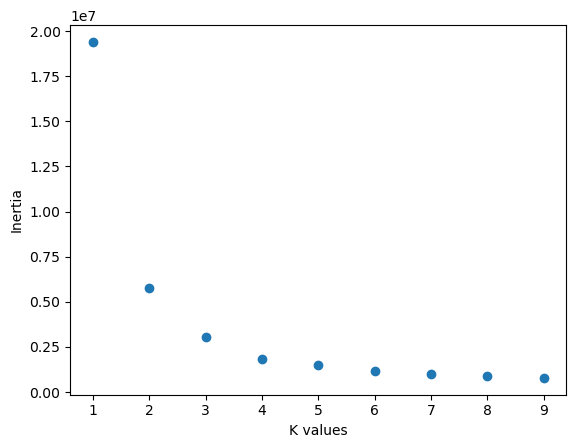

In [85]:
fig, ax = plt.subplots()
plt.scatter(boston_clusters, boston_cluster_inertia)
ax.set_xlabel('K values')
ax.set_ylabel('Inertia')

**From the elbow graph we can figure that 3 is the suitable K value**

In [86]:
kmeans_boston = KMeans(n_clusters=3)
kmeans_boston.fit(boston_data)

print(kmeans_boston.inertia_)
print("The Cluster centers")
print(kmeans_boston.cluster_centers_)

3068499.4101235787
The Cluster centers
[[ 1.09105113e+01  5.32907052e-15  1.85725494e+01  7.84313725e-02
   6.71225491e-01  5.98226469e+00  8.99137258e+01  2.07716372e+00
   2.30196078e+01  6.68205882e+02  2.01950988e+01  3.71803037e+02
   1.78740196e+01  1.74294118e+01]
 [ 1.52190382e+01 -3.55271368e-15  1.79268425e+01  2.63157895e-02
   6.73710530e-01  6.06550002e+00  8.99052633e+01  1.99442896e+00
   2.25000000e+01  6.44736842e+02  1.99289480e+01  5.77863156e+01
   2.04486841e+01  1.31263158e+01]
 [ 3.74992678e-01  1.57103825e+01  8.35953551e+00  7.10382514e-02
   5.09862569e-01  6.39165301e+00  6.04133879e+01  4.46074482e+00
   4.45081967e+00  3.11232240e+02  1.78177596e+01  3.83489807e+02
   1.03886612e+01  2.49316940e+01]]
